In [36]:
#%%shell
#jupyter nbconvert --to html /content/GPA_ML_PROJECT.ipynb

Jacob Simmons, Machine Learning Project, 11 Nov 2023

Using a "Duke GPA" dataset provided on Kaggle.com

---
# **Project Outline**
* Data cleaning and formatting
* Exploratory data analysis
* Feature engineering and selection
* Compare several machine learning models on a performance metric
* Perform hyperparameter tuning on the best model
* Evaluate the best model on the testing set
* Interpret the model results
* Draw conclusions and document work
---
Thanks to the below example for providing the outline and guidance for this project. [Example](https://towardsdatascience.com/a-complete-machine-learning-project-walk-through-in-python-part-two-300f1f8147e2)

---

# Goal
Train model to predict GPA based on number of hours studied each week, number of hours sleep, gender, and how many nights they go out.


**Response**
*   GPA


**Factors**


*   No. of hours slept (float)
*   No. of hours studied each week (int)
* Nights out / not studying during sample period (float)
* Gender (0 = Female, 1 = Male, float)




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read in data into a dataframe
data = pd.read_csv('/content/sample_data/gpa.csv')

#Display first 15 lines in dataframe
data.head(15)


,gpa,studyweek,sleepnight,out,gender
0,3.890,50,6.0,3.0,female
1,3.900,15,6.0,1.0,female
2,3.750,15,7.0,1.0,female
3,3.600,10,6.0,4.0,male
4,4.000,25,7.0,3.0,female
5,3.150,20,7.0,3.0,male
6,3.250,15,6.0,1.0,female
7,3.925,10,8.0,3.0,female
8,3.428,12,8.0,2.0,female
9,3.800,2,8.0,4.0,male


---
# Data cleaning and formatting


In [38]:
#See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gpa         55 non-null     float64
 1   studyweek   55 non-null     int64  
 2   sleepnight  55 non-null     float64
 3   out         55 non-null     float64
 4   gender      55 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.3+ KB


The above info indicates the "gender" data type is an object. This cannot be processed and needs to be changed to a data type that can be processed in the hereafter machine learning models.

Therefore "Female" will be transferred to 0 and Male will be transferred to 1. This will allow the model to process the input factor appropriately.

In [39]:
#Replace instances
data_mod1 = data.replace({"female": 0, "male": 1})


In [40]:
#Check data types after change
data_mod1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gpa         55 non-null     float64
 1   studyweek   55 non-null     int64  
 2   sleepnight  55 non-null     float64
 3   out         55 non-null     float64
 4   gender      55 non-null     int64  
dtypes: float64(3), int64(2)
memory usage: 2.3 KB


This indicates that data is of the correct data types for machine learning processing as well as all values are non-null (not blank).

We will now move to the exploritory efforts.

---
# Exploratory data analysis & Feature engineering and selection

**Analysis Plan**

The below plan was established to help understand if engineered features could be established to help correlate the impact of the input factors on the intended response.

Line|Exploration Task|Purpose|Result
-----|-----------|---------------|---------------
1|Correlation Heat Map|Determine if significant relationships exist between factors| TBD
2|Box Plot GPA by Gender|Determine if GPA differences between genders are statistically significant|TBD
3|Linear Regression Plot For GPA|Determine if meaningful relationships exist between factors|TBD


The charts will now be generated in accordance with the above plan.


**Correlation Heat Map**

[Text(0.5, 1.0, 'Combined Correlation Heat Map')]

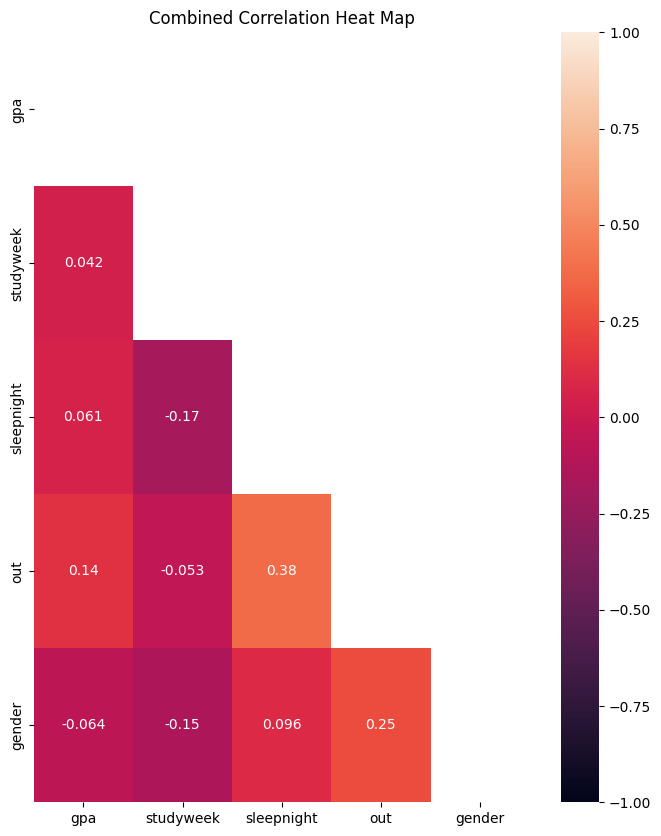

In [41]:
#Mask assigned to eliminate the "mirror effect" for the top part of the heatmap triangle - removes clutter
mask = np.triu(np.ones_like(data_mod1.corr(), dtype=bool))

#Heat map using the modified data frame for gender
sns.heatmap(data_mod1.corr(),vmin=-1,vmax=1,mask=mask, annot=True).set(title="Combined Correlation Heat Map")

[Text(0.5, 1.0, 'Female Correlation Heat Map')]

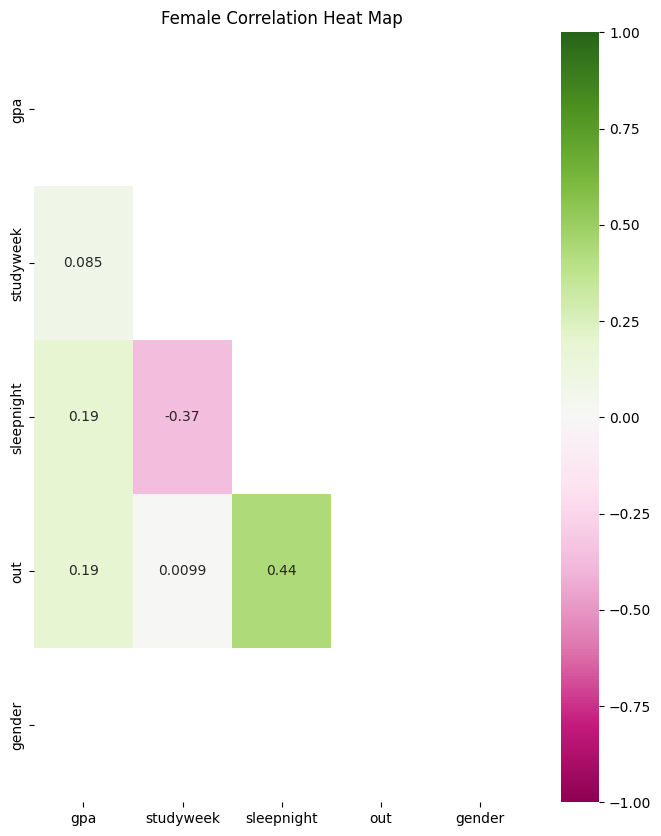

In [42]:
#Mask assigned to eliminate the "mirror effect" for the top part of the heatmap triangle - removes clutter
mask = np.triu(np.ones_like(data_mod1[(data_mod1['gender']==0)].corr(), dtype=bool))

#Heatmap to use the modified data frame for gender while only calling the data for Females
sns.heatmap(data_mod1[(data_mod1['gender']==0)].corr(),vmin=-1,vmax=1,mask=mask, annot=True,cmap='PiYG').set(title="Female Correlation Heat Map")

[Text(0.5, 1.0, 'Male Correlation Heat Map')]

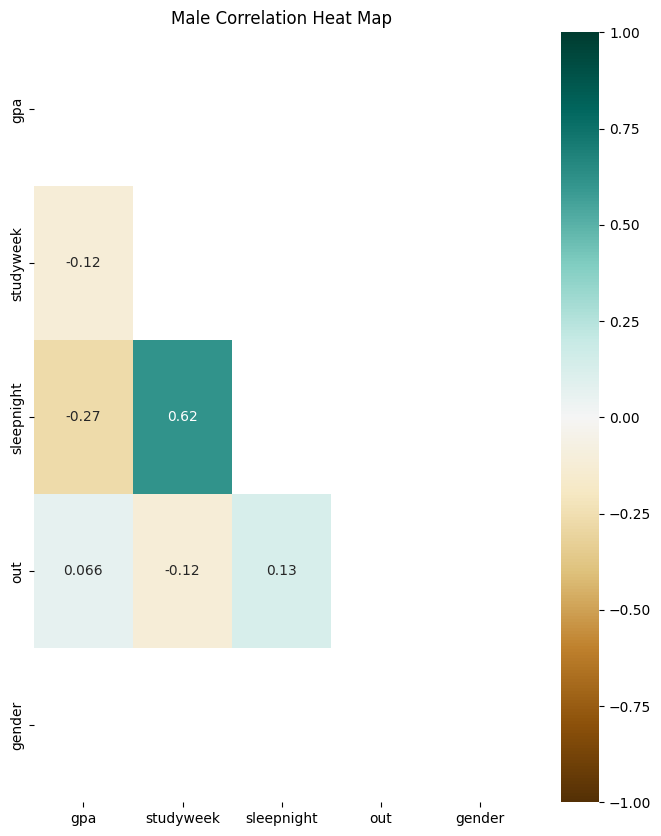

In [43]:
#Mask assigned to eliminate the "mirror effect" for the top part of the heatmap triangle - removes clutter
mask = np.triu(np.ones_like(data_mod1[(data_mod1['gender']==1)].corr(), dtype=bool))

#Heatmap to use the modified data frame for gender while only calling the data for Females
sns.heatmap(data_mod1[(data_mod1['gender']==1)].corr(),vmin=-1,vmax=1,mask=mask, annot=True,cmap='BrBG').set(title="Male Correlation Heat Map")


The above heatmaps show $R^2$ values for each of the factors. $R^2$ values can provide an estimate of "how well" a change in one factor can affect another. This index generally ranges between 0-1 (1 being a very strong estimator/relationship, and 0 being a very weak estimator/relationship) and is used in-conjunction with other statistical tools to help make informed decisions.

Looking at the "Combined Correlation Heat Map", most of the factors show low correlation, with the highest being +0.38, which is the number of nights out and the number of hours sleeping (more nights out *might* mean more time sleeping), but this is not an important factor to change GPA. The "Female Correlation Heat Map" shows this as the most important correlation factor at +0.44, but again, this is not important for the purposes of this study.

Looking at the "Male Correlation Heat Map", most of the factors show low correlation, with the hightest being +0.62, which is the number of hours spent studying and the number of hours sleeping (sleeping more *might* mean more studying), again, not important for our purposes.


**BoxPlot GPA by Gender**

[Text(0.5, 1.0, 'GPA Box Plot')]

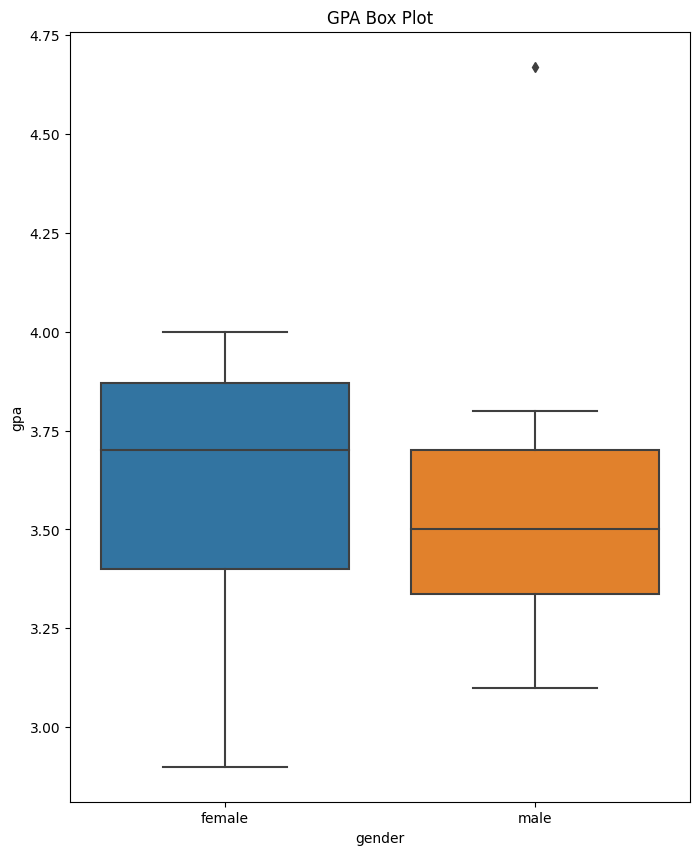

In [44]:
sns.boxplot(data=data, x='gender', y='gpa').set(title='GPA Box Plot')


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(3.74, 11.2, '-Normally Distributed')

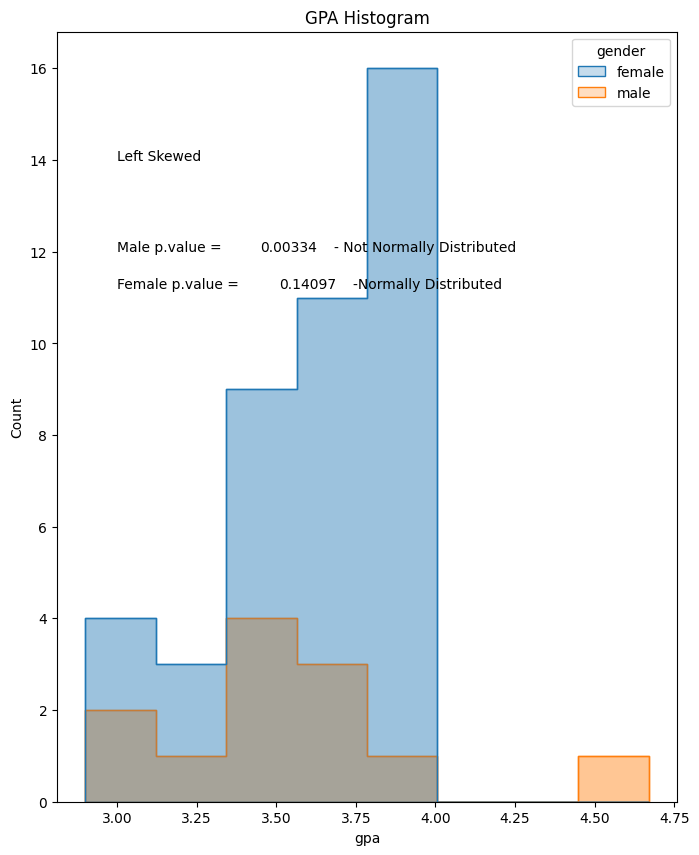

In [45]:
sns.histplot(data=data, x = 'gpa', hue='gender',element='step').set(title='GPA Histogram')
ax = sns.histplot(data=data, x = 'gpa', hue='gender',element='step')


ax.text(3,14,"Left Skewed")
ax.text(3,12,"Male p.value = ")
ax.text(3.45,12,"{:.5f}".format(round(stats.normaltest(data[(data['gender']=='male')]['gpa']).pvalue, 8)))
ax.text(3.68,12,"- Not Normally Distributed")

ax.text(3,11.2,"Female p.value = ")
ax.text(3.51,11.2,"{:.5f}".format(round(stats.normaltest(data[(data['gender']=='female')]['gpa']).pvalue, 8)))
ax.text(3.74,11.2,"-Normally Distributed")


Before understanding if the differences observed between the GPAs are statistically significant, the normality of the two gender gpa distributions should be understood. The above analysis indicates the male data is not normally distrubuted.

Looking at the dataset, the dataset is small (Male n = 13), so caution should be used in fully utilizing this dataset.

This would indicate the data needs to be transformed before a statistical difference can be determined. A common practice is to transform the data using Logarithmic, Square, or Reciprocal transformation.

In [46]:
# Logarithm transformation
male_transform = np.log10(data[(data['gender']=='male')]['gpa'])
female_transform = np.log10(data[(data['gender']=='female')]['gpa'])

#retest normality for male data after transformation
print("Male p.value after Logarithm transformation:", stats.normaltest(male_transform).pvalue)
print("Female p.value after Logarithm transformation:", stats.normaltest(female_transform).pvalue)

# Square transformation
male_transform = np.square(data[(data['gender']=='male')]['gpa'])
female_transform = np.square(data[(data['gender']=='female')]['gpa'])

#retest normality for male data after transformation
print("Male p.value after square transformation:", stats.normaltest(male_transform).pvalue)
print("Female p.value after square transformation:", stats.normaltest(female_transform).pvalue)

# Reciprical transformation
male_transform = np.reciprocal(data[(data['gender']=='male')]['gpa'])
female_transform = np.reciprocal(data[(data['gender']=='female')]['gpa'])

#retest normality for male data after transformation
print("Male p.value after reciprocal transformation:", stats.normaltest(male_transform).pvalue)
print("Female p.value after reciprocal transformation:", stats.normaltest(female_transform).pvalue)

# Logarithm transformation
male_transform = np.log10(data[(data['gender']=='male')]['gpa'])
female_transform = np.log10(data[(data['gender']=='female')]['gpa'])

#Run t-test with logarithm transformation data:
print("T-Test Result Using Logarithm Data: ", stats.ttest_ind(a=male_transform, b=female_transform,equal_var=True).pvalue)

Male p.value after Logarithm transformation: 0.027970978442275866
Female p.value after Logarithm transformation: 0.06892880478622003
Male p.value after square transformation: 0.0003684620607813871
Female p.value after square transformation: 0.18130675950724842
Male p.value after reciprocal transformation: 0.16223763286414422
Female p.value after reciprocal transformation: 0.022267584341110737
T-Test Result Using Logarithm Data:  0.5983351772246618


Looking at the various transformation types applied equally to both datasets, none of them provide the perfect transformation (p.value > 0.05), therefore we will choose the best choice - Logarithm (Male p.value = 0.03, Female p.value = 0.07).

Running the 2-way t-test for the Logarithm Transformation data, the results show a p-value of 0.598. **This indicates there is no statistical difference between the Male and Female GPA datasets given the limitations in the data and transformations.**

**Linear Regression Plot For GPA**

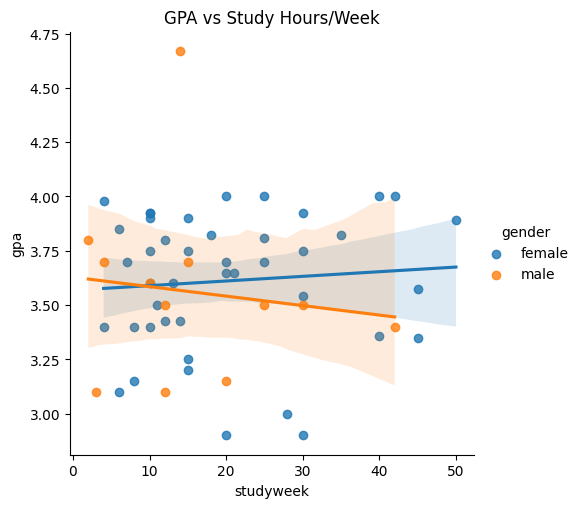

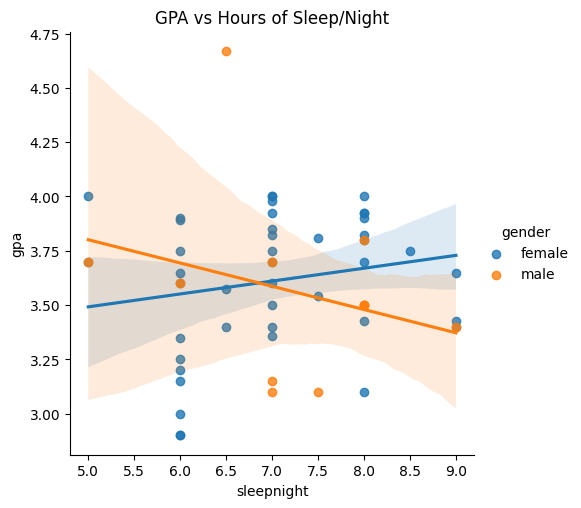

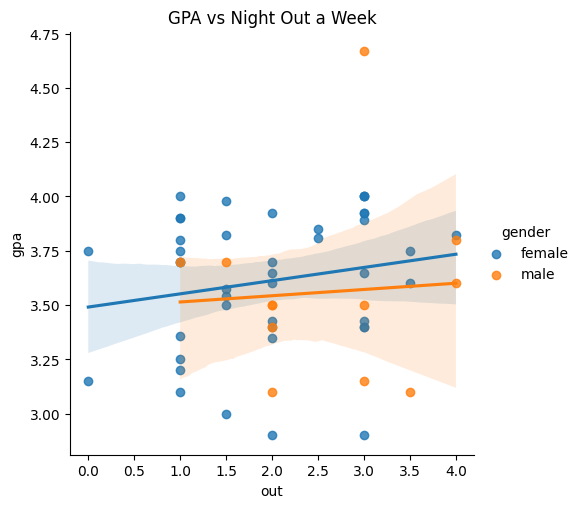

In [47]:
sns.lmplot(data=data, x='studyweek', y='gpa', hue='gender',height=5).set(title='GPA vs Study Hours/Week')
sns.lmplot(data=data, x='sleepnight', y='gpa', hue='gender',height=5).set(title='GPA vs Hours of Sleep/Night')
sns.lmplot(data=data, x='out', y='gpa', hue='gender',height=5).set(title='GPA vs Night Out a Week')

Looking at the data above, the confidence intervals for each regression line is wide and shows little correlation between the factors - which matches our intial correlation matrix as above.

**Analysis Results**

Line|Exploration Task|Purpose|Result
-----|-----------|---------------|---------------
1|Correlation Heat Map|Determine if significant relationships exist between factors| No significant linear correlations exist in the dataset while linking Response to the provided input Factors
2|Box Plot GPA by Gender|Determine if GPA differences between genders are statistically significant|After data transformation, there is no statistical differences between the genders
3|Linear Regression Plot For GPA|Determine if meaningful relationships exist between factors| No meaningful linear correlations exist in the dataset while linking the Response to the provided input Factors


**This would indicate using Machine Learning models which are non-linear might yield more accurate predictions.**

# Compare several machine learning models on a performance metric



In [48]:
#Apply Log function to all Feature/Label data to "normalize the data" for model processing
features = data.copy()

#Select the non-string columns
numberic_subset = data.select_dtypes('number')

#Generate logrithmic data for features using non-string columns
for col in numberic_subset.columns:
  #Exclude gpa data row
  if col =='gpa':
    next
  else:
    numberic_subset['log_' + col] = np.log10(numberic_subset[col])

#Select the string columns after being converted to one-hot encoding
categorical_subset = data_mod1['gender']

#Join the above data subsets into a completed feature dataframe
features = pd.concat([numberic_subset, categorical_subset], axis = 1)

#Seperate the data into the Features and Labels data for model processing
features = features.drop(columns='gpa')
targets = data['gpa']

#print(data.shape)
#print(data.head())
#print(features.shape)
#print(features.head())
#print(targets.shape)
#targets.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
from sklearn.model_selection import train_test_split
#Split the data into 70% training and 30% testing subsets
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

The dataset will need to be further analysed to ensure the data integrity is solid. It is observed in the dataset that some "inf" exist in the data set, these need to be removed before Machine Learning can be started.

In [50]:
print(X.info())
print(X.shape)
print(X.head())
print(X_test.info())
print(X_test.head())
print(y.info())
print(y.info())
print(y_test.info())
print(y_test.head())

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(subset=["log_out"], how="all", inplace=True)
y=y.drop([0,1])
#y.shape

#print(X.info())
#print(X.shape)
#print(X.head(50))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 4 to 38
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studyweek       38 non-null     int64  
 1   sleepnight      38 non-null     float64
 2   out             38 non-null     float64
 3   log_studyweek   38 non-null     float64
 4   log_sleepnight  38 non-null     float64
 5   log_out         38 non-null     float64
 6   gender          38 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 2.4 KB
None
(38, 7)
    studyweek  sleepnight  out  log_studyweek  log_sleepnight   log_out  \
4          25         7.0  3.0       1.397940        0.845098  0.477121   
47         25         8.0  2.0       1.397940        0.903090  0.301030   
27         14         9.0  3.0       1.146128        0.954243  0.477121   
46         42         9.0  2.0       1.623249        0.954243  0.301030   
45          3         7.0  2.0       0.477121        0.

In [51]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 3.57
Baseline Performance on the test set: MAE = 0.2123


This is the Mean Absolute Error (MAE) calculations, it shows our average estimate on the test set is off by 20 pts. The score being from 1-100 indicates that our average error is about 20%. This will serve as a baseline for testing with various Machine Learning Models.

In [52]:
# Create local files for training data
X.to_csv('sample_data/training_features.csv', index = False)
X_test.to_csv('sample_data/testing_features.csv', index = False)
y.to_csv('sample_data/training_labels.csv', index = False)
y_test.to_csv('sample_data/testing_labels.csv', index = False)

In [53]:
# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [54]:
# Read in data into dataframes
train_features = pd.read_csv('sample_data/training_features.csv')
test_features = pd.read_csv('sample_data/testing_features.csv')
train_labels = pd.read_csv('sample_data/training_labels.csv')
test_labels = pd.read_csv('sample_data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (36, 7)
Testing Feature Size:   (17, 7)
Training Labels Size:   (36, 1)
Testing Labels Size:    (17, 1)


In [55]:
train_features.head(5)


,studyweek,sleepnight,out,log_studyweek,log_sleepnight,log_out,gender
0,25,7.0,3.0,1.397940,0.845098,0.477121,0
1,25,8.0,2.0,1.397940,0.903090,0.301030,1
2,14,9.0,3.0,1.146128,0.954243,0.477121,0
3,42,9.0,2.0,1.623249,0.954243,0.301030,1
4,3,7.0,2.0,0.477121,0.845098,0.301030,1


In [56]:
X

,studyweek,sleepnight,out,log_studyweek,log_sleepnight,log_out,gender
4,25,7.0,3.0,1.397940,0.845098,0.477121,0
47,25,8.0,2.0,1.397940,0.903090,0.301030,1
27,14,9.0,3.0,1.146128,0.954243,0.477121,0
46,42,9.0,2.0,1.623249,0.954243,0.301030,1
45,3,7.0,2.0,0.477121,0.845098,0.301030,1
53,30,7.5,1.5,1.477121,0.875061,0.176091,0
15,14,6.5,3.0,1.146128,0.812913,0.477121,1
9,2,8.0,4.0,0.301030,0.903090,0.602060,1
16,12,7.5,3.5,1.079181,0.875061,0.544068,1
24,35,8.0,4.0,1.544068,0.903090,0.602060,0


The below Machine Learning Models will be used to test various parameters to ensure the most accurate model is chosen.

In [57]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):

    # Train the model
    model.fit(X, y)

    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)

    # Return the performance metric
    return model_mae




In [58]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 0.3292


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X, y)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae1 = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae1)

Gradient Boosted Performance on the test set: MAE = 0.3600


In [60]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 0.2574


In [61]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.3152


In [62]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.3572


In [63]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2223


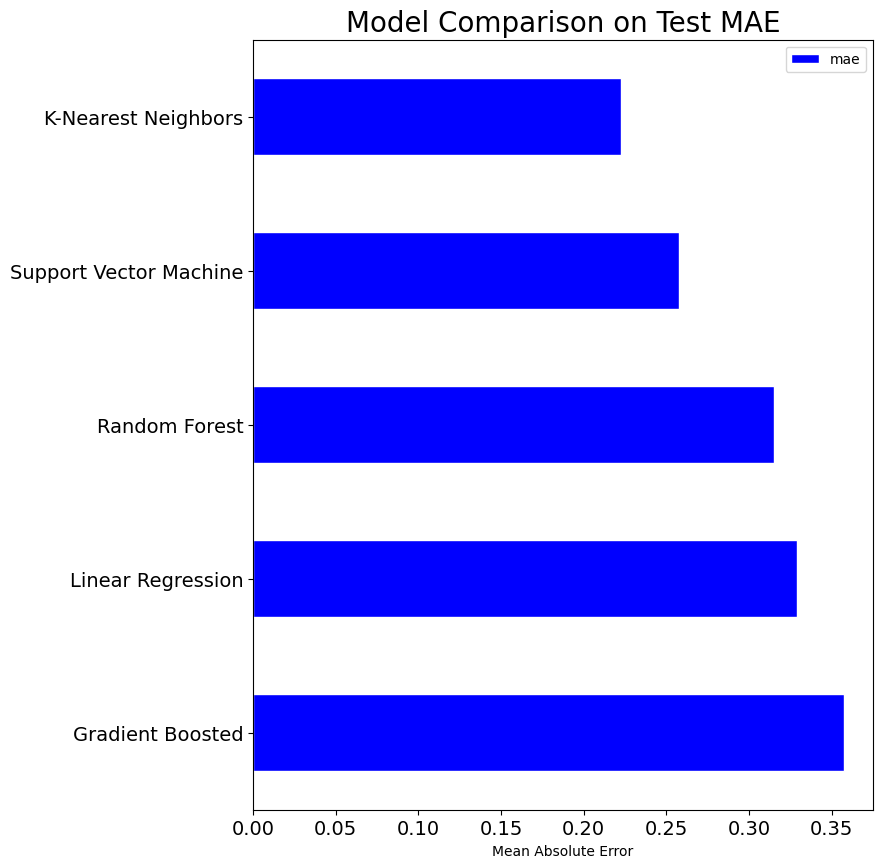

In [64]:


# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae,
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'blue', edgecolor = 'white')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

The above comparison represents the Mean Absolute Error calculations using the tested Machine Leaning Models. This index represents the difference (or loss) between the calculated and actual values. The lower the number the less error (or loss) the model demonstrates. In our case, the K-Nearest Neighbors model has the lowest error.

There are optimizers within each machine learning model that can be untilized, however for the purpose of this study, it will be determined on the above calucations.


**Feature Importance**


Best alpha using built-in LassoCV: 0.016844
Best score using built-in LassoCV: 0.236302
Lasso picked 3 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

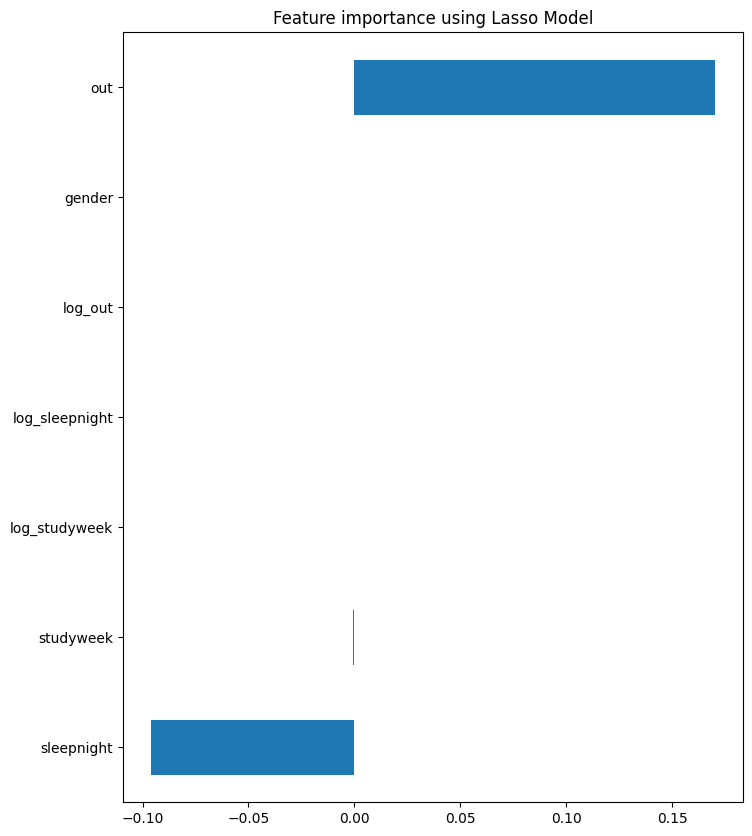

In [65]:
model = KNeighborsRegressor(n_neighbors=10)

#importing libraries
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

As the K-Nearest Neighbor model showed the lowest MAE, the feature importance was determined using the Lasso Model. The above was generated using [this](https://stackoverflow.com/questions/55314345/how-to-find-feature-importance-or-variable-importance-graph-for-knnclassifier) StackOverflow post.


# Conclusion

This was a great introduction to machine learning as it had a clear outline of the expectations, clearly defined the factors and responses. It also used industry standard libraries to generate the model. We learned the following:


*   A machine learning model was able to be developed that was able to predict GPA with a 0.223 MAE using the K-Nearest Neighbor model.
*   The importance feature for this model showed number of nights out had a positive impact and the number of hours slept had a negative effect.



